In [4]:
import pandas as pd
from demandlib import bdew
import datetime

In [ ]:
# -*- coding: utf-8 -*-
"""
Creating power demand profiles using BDEW profiles for residential, commercial
and agricultural loads, as well as step load profiles for industrial loads.

Installation requirements
-------------------------
This example requires at least version v0.1.4 of the oemof demandlib. Install
by:
    pip install 'demandlib>=0.1.4,<0.2'
It further requires matplotlib for plotting:
    pip install matplotlib

SPDX-FileCopyrightText: Birgit Schachler
SPDX-FileCopyrightText: Uwe Krien <krien@uni-bremen.de>
SPDX-FileCopyrightText: Stephen Bosch

SPDX-License-Identifier: MIT

"""

C:\Users\z003yeph\AppData\Local\miniconda3\envs\fh\Lib\site-packages\demandlib\bdew\elec_slp.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[7 7 7 ... 5 5 5]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  new_df.update(merged_df)
C:\Users\z003yeph\AppData\Local\miniconda3\envs\fh\Lib\site-packages\demandlib\bdew\elec_slp.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0  0  0 ... 23 23 23]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  new_df.update(merged_df)
C:\Users\z003yeph\AppData\Local\miniconda3\envs\fh\Lib\site-packages\demandlib\bdew\elec_slp.py:154: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0 15 30 ... 15 30 45]' has dtype incompatible with int32, please expl

Be aware that the values in the DataFrame are 15 minute values with a power unit. If you sum up a table with 15min values the result will be of the unit 'kW15minutes'.
g0        12000.0
g6        20000.0
h0        12000.0
h0_dyn    12000.0
i0        12000.0
i1        20000.0
i2        24000.0
dtype: float64
You will have to divide the result by 4 to get kWh.
g0        3000.0
g6        5000.0
h0        3000.0
h0_dyn    3000.0
i0        3000.0
i1        5000.0
i2        6000.0
dtype: float64
Or resample the DataFrame to hourly values using the mean() method.
g0        3000.0
g6        5000.0
h0        3000.0
h0_dyn    3000.0
i0        3000.0
i1        5000.0
i2        6000.0
dtype: float64


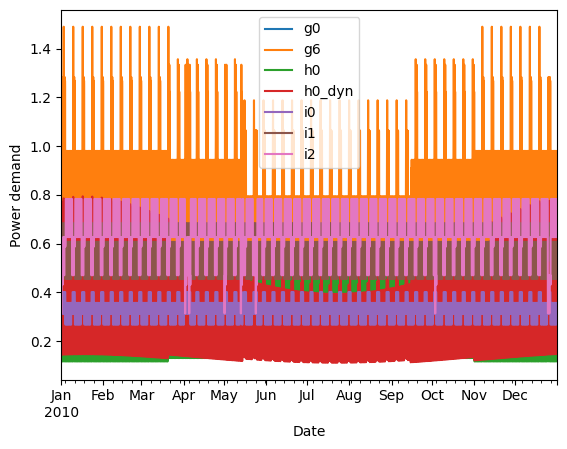

                           g0        g6        h0    h0_dyn        i0  \
2010-01-01 00:00:00  0.187744  0.503373  0.262793  0.325869  0.311557   
2010-01-01 00:15:00  0.181328  0.458069  0.243799  0.302321  0.311557   
2010-01-01 00:30:00  0.175030  0.417799  0.225406  0.279518  0.311557   
2010-01-01 00:45:00  0.169326  0.387597  0.207614  0.257459  0.311557   
2010-01-01 01:00:00  0.164217  0.367462  0.190663  0.236443  0.311557   
...                       ...       ...       ...       ...       ...   
2010-12-31 22:45:00  0.222085  0.533575  0.317732  0.401314  0.356065   
2010-12-31 23:00:00  0.218876  0.478204  0.294410  0.371864  0.356065   
2010-12-31 23:15:00  0.214718  0.427867  0.271088  0.342414  0.356065   
2010-12-31 23:30:00  0.209370  0.387597  0.247886  0.313114  0.356065   
2010-12-31 23:45:00  0.202597  0.347327  0.225165  0.284421  0.267048   

                           i1        i2  
2010-01-01 00:00:00  0.530757  0.313138  
2010-01-01 00:15:00  0.530757  0.313138

In [9]:
import datetime
from datetime import time as settime

import numpy as np
from matplotlib import pyplot as plt

import demandlib.bdew as bdew
import demandlib.particular_profiles as profiles

# The following dictionary is create by "workalendar"
# pip3 install workalendar
# >>> from workalendar.europe import Germany
# >>> cal = Germany()
# >>> holidays = dict(cal.holidays(2010))

holidays = {
    datetime.date(2010, 5, 24): "Whit Monday",
    datetime.date(2010, 4, 5): "Easter Monday",
    datetime.date(2010, 5, 13): "Ascension Thursday",
    datetime.date(2010, 1, 1): "New year",
    datetime.date(2010, 10, 3): "Day of German Unity",
    datetime.date(2010, 12, 25): "Christmas Day",
    datetime.date(2010, 5, 1): "Labour Day",
    datetime.date(2010, 4, 2): "Good Friday",
    datetime.date(2010, 12, 26): "Second Christmas Day",
}

ann_el_demand_per_sector = {
    "g0": 3000,
    "h0": 3000,
    "h0_dyn": 3000,
    "i0": 3000,
    "i1": 5000,
    "i2": 6000,
    "g6": 5000,
}

year = 2010

# read standard load profiles
e_slp = bdew.ElecSlp(year, holidays=holidays)

# multiply given annual demand with timeseries
elec_demand = e_slp.get_profile(ann_el_demand_per_sector)

# Add the slp for the industrial group
ilp = profiles.IndustrialLoadProfile(e_slp.date_time_index, holidays=holidays)

# Beginning and end of workday, weekdays and weekend days, and scaling
# factors by default
elec_demand["i0"] = ilp.simple_profile(ann_el_demand_per_sector["i0"])

# Set beginning of workday to 9 am
elec_demand["i1"] = ilp.simple_profile(
    ann_el_demand_per_sector["i1"], am=settime(9, 0, 0)
)

# Change scaling factors
elec_demand["i2"] = ilp.simple_profile(
    ann_el_demand_per_sector["i2"],
    profile_factors={
        "week": {"day": 1.0, "night": 0.8},
        "weekend": {"day": 0.8, "night": 0.6},
        "holiday": {"day": 0.6, "night": 0.4},
    },
)

print(
    "Be aware that the values in the DataFrame are 15 minute values "
    "with a power unit. If you sum up a table with 15min values "
    "the result will be of the unit 'kW15minutes'."
)
print(elec_demand.sum())

print("You will have to divide the result by 4 to get kWh.")
print(elec_demand.sum() / 4)

print("Or resample the DataFrame to hourly values using the mean() method.")

# Resample 15-minute values to hourly values.
elec_demand_resampled = elec_demand.resample("h").mean()
print(elec_demand_resampled.sum())

# Plot demand
ax = elec_demand_resampled.plot()
ax.set_xlabel("Date")
ax.set_ylabel("Power demand")
plt.show()

print(elec_demand)

for key in ann_el_demand_per_sector:
    assert np.isclose(
        elec_demand[key].sum() / 4, ann_el_demand_per_sector[key]
    )